In [1]:
import pandas as pd
import numpy as np

In [2]:
survey_raw_df = pd.read_csv('survey_results_public.csv')
survey_raw_df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [12]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [16]:
schema_fname = pd.read_csv('survey_results_schema.csv',index_col='Column').QuestionText
schema_fname

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [17]:
schema_raw=pd.read_csv('survey_results_schema.csv',index_col='Column').QuestionText
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [18]:
schema_raw['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

# Data Preparation and Cleaning 

While the survey responses contain a wealth of information, we'll limit our analysis to the following areas:

Demographics of the survey respondents and the global programming community

Distribution of programming skills, experience, and preferences

Employment-related information, preferences, and opinions

Let's select a subset of columns with the relevant data for our analysis.

In [19]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [20]:
len(selected_columns)

20

In [25]:
survey_df = survey_raw_df[selected_columns].copy()

In [26]:
schema = schema_raw[selected_columns]

In [30]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [34]:
survey_df.Age1stCode.unique()

array([13., 19., 15., 18., 16., 14., 12., 20., 42.,  8., 25., 22., 30.,
       17., 21., 10., 46.,  9.,  7., 11.,  6., nan, 31., 29.,  5., 28.,
       38., 23., 27., 41., 24., 53., 26., 35., 32., 40., 33., 36., 54.,
       48., 56., 45., 44., 34., 39., 51., 68., 50., 37., 47., 43., 52.,
       85., 64., 55., 58., 49., 76., 72., 73., 83., 63.])

In [35]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

In [36]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


In [38]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)

In [39]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace=True)

In [40]:
survey_df['Gender'].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [42]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

In [43]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
29832,United States,33.0,Man,Some college/university study without earning ...,"A business discipline (such as accounting, fin...",Yes,12.0,21.0,15.0,HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;SQL;TypeScript,Once every few years,Call a coworker or friend;Do other work and co...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",40.0,Slightly satisfied,Industry that I’d be working in;Flex time or a...,Rarely: 1-2 days per year or less,Not at all important/not necessary
58029,Republic of Korea,22.0,Woman,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,12.0,6.0,NaN,HTML/CSS;JavaScript;SQL,Go;HTML/CSS;JavaScript;Rust;SQL,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, full-stack",40.0,Neither satisfied nor dissatisfied,"Flex time or a flexible schedule;Languages, fr...",Sometimes: 1-2 days per month but less than we...,Fairly important
18467,United States,59.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Another engineering discipline (such as civil,...",Yes,16.0,40.0,36.0,C;Perl;Python;SQL,C;Go;Julia;Perl;R;Rust;SQL,Once every few years,Meditate;Call a coworker or friend;Visit Stack...,Employed full-time,"Database administrator;Developer, back-end",45.0,Very satisfied,Flex time or a flexible schedule;Office enviro...,Often: 1-2 days per week or more,Very important
35640,United States,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,No,NaN,NaN,NaN,HTML/CSS;JavaScript;TypeScript,NaN,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
1658,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",No,18.0,7.0,NaN,Dart;Go;Haskell;HTML/CSS;Java;JavaScript;Python,Dart;Go;Haskell;HTML/CSS;Java;JavaScript;Kotli...,Every few months,Visit Stack Overflow;Go for a walk or other ph...,Student,NaN,NaN,NaN,"Flex time or a flexible schedule;Languages, fr...",NaN,NaN
55843,Germany,28.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,12.0,12.0,3.0,C++;Go;HTML/CSS;Java;JavaScript;Kotlin;Rust;Sw...,Go;JavaScript;Kotlin;Rust;TypeScript,Every few months,Play games;Call a coworker or friend;Visit Sta...,Employed full-time,"Developer, full-stack",40.0,Very satisfied,"Languages, frameworks, and other technologies ...",Sometimes: 1-2 days per month but less than we...,Not at all important/not necessary
54447,New Zealand,42.0,Man,"Secondary school (e.g. American high school, G...",NaN,Yes,8.0,24.0,22.0,C#;HTML/CSS;JavaScript;SQL,C#,Once a decade,NaN,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",70.0,Very satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Not at all important/not necessary
30717,Croatia,30.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,14.0,10.0,6.0,HTML/CSS;Java;JavaScript;Kotlin;PHP;TypeScript,HTML/CSS;Java;JavaScript;Kotlin;Python;TypeScript,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,"Developer, front-end;Developer, mobile",39.0,Neither satisfied nor dissatisfied,"Flex time or a flexible schedule;Languages, fr...",Never,Very important
33300,Italy,41.0,Man,"Secondary school (e.g. American high school, G...",NaN,Yes,6.0,30.0,20.0,Bash/Shell/PowerShell;C;Java;Python;SQL,Bash/Shell/PowerShell;C;Python;SQL,Once every few years,Visit Stack Overflow,Employed full-time,"Developer, back-end;Developer, desktop or ente...",44.0,Slightly dissatisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 

# Exploratory Analysis and Visualization

In [47]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Country

In [48]:
schema.Country

'Where do you live?'

In [49]:
survey_df.Country.nunique()

183

In [50]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

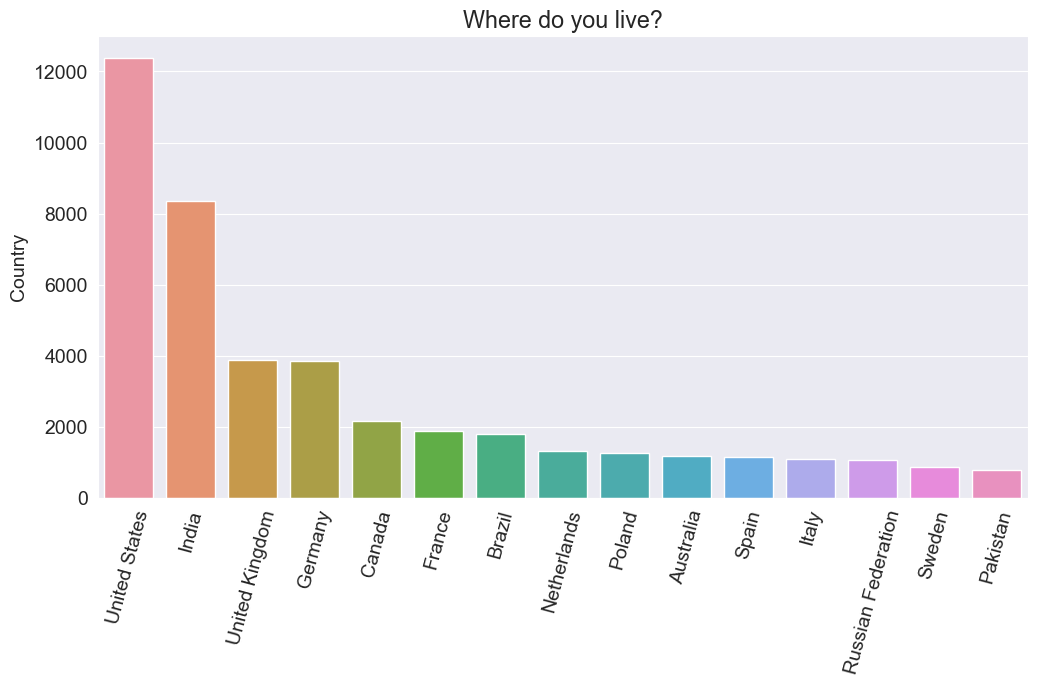

In [51]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(x=top_countries.index, y=top_countries);

It appears that a disproportionately high number of respondents are from the US and India, probably because the survey is in English, and these countries have the highest English-speaking populations. We can already see that the survey may not be representative of the global programming community - especially from non-English speaking countries. Programmers from non-English speaking countries are almost certainly underrepresented.

# Age

In [54]:
schema.Age

'What is your age (in years)? If you prefer not to answer, you may leave this question blank.'

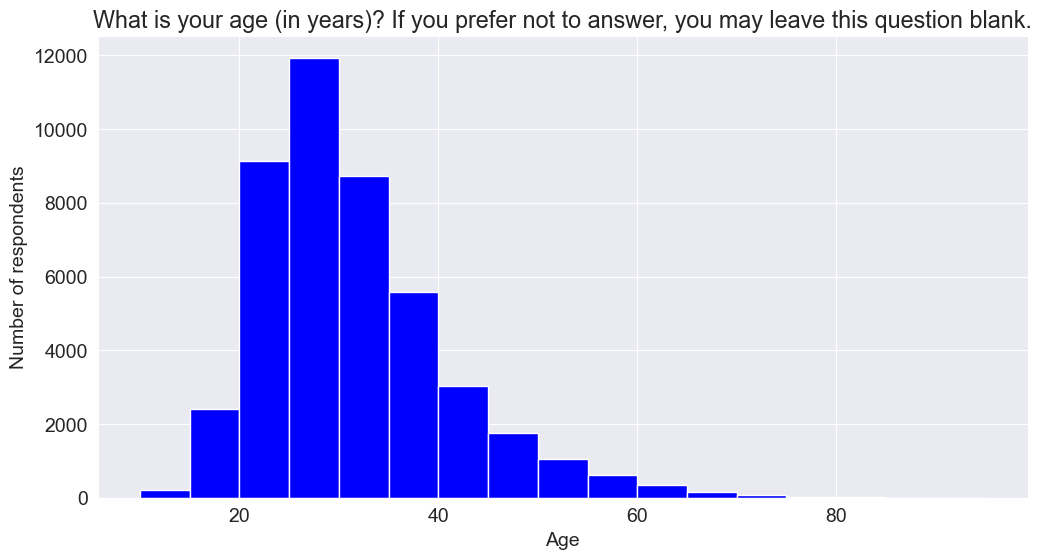

In [55]:
plt.figure(figsize=(12, 6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(survey_df.Age, bins=np.arange(10,100,5), color='blue');

It appears that a large percentage of respondents are 20-45 years old. It's somewhat representative of the programming community in general. Many young people have taken up computer science as their field of study or profession in the last 20 years.

# Gender

In [56]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [57]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

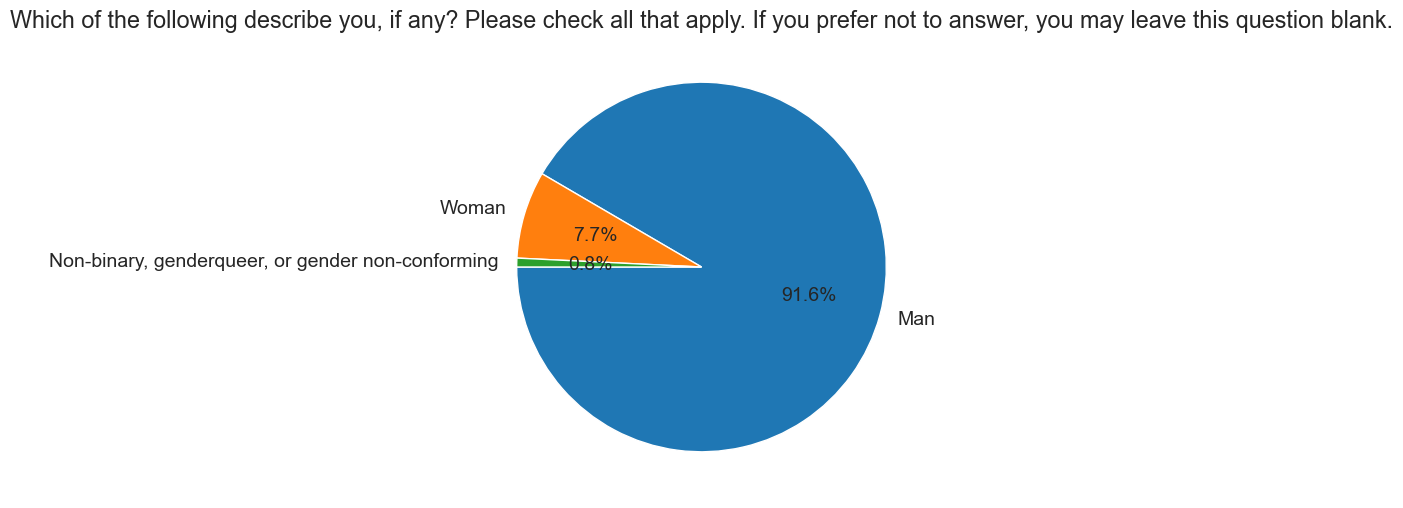

In [58]:
plt.figure(figsize=(12,6))
plt.title(schema.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

Only about 8% of survey respondents who have answered the question identify as women or non-binary. This number is lower than the overall percentage of women & non-binary genders in the programming community - which is estimated to be around 12%.

# Education_level

In [61]:
schema.EdLevel

'Which of the following best describes the highest level of formal education that you’ve completed?'

In [63]:
survey_df.EdLevel.unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', nan,
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, etc.)',
       'Some college/university study without earning a degree',
       'Associate degree (A.A., A.S., etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school',
       'I never completed any formal education'], dtype=object)

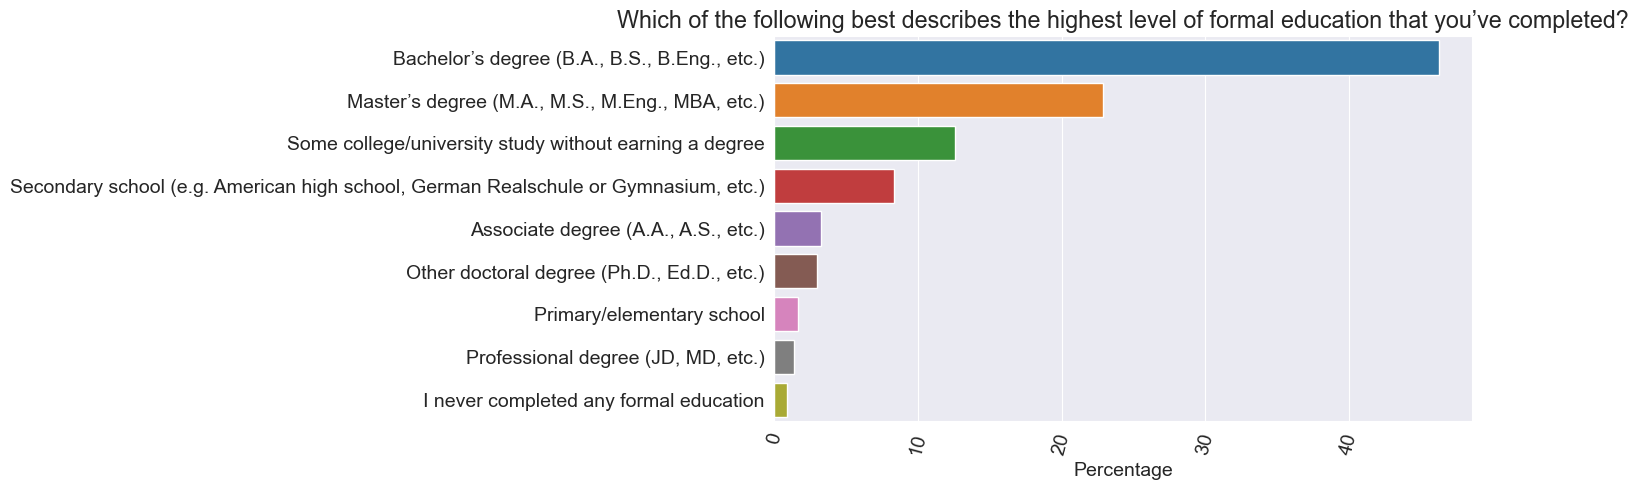

In [65]:

percentages = survey_df['EdLevel'].value_counts(normalize=True) * 100


sns.barplot(
    y=percentages.index,  # Categories
    x=percentages.values,  # Percentage values
    orient='h'  # Horizontal bar plot
)


plt.xticks(rotation=75)


plt.title(schema['EdLevel'])
plt.xlabel('Percentage')
plt.ylabel(None)


plt.show()

It appears that well over half of the respondents hold a bachelor's or master's degree, so most programmers seem to have some college education. However, it's not clear from this graph alone if they hold a degree in computer science.

In [66]:
schema.UndergradMajor

'What was your primary field of study?'

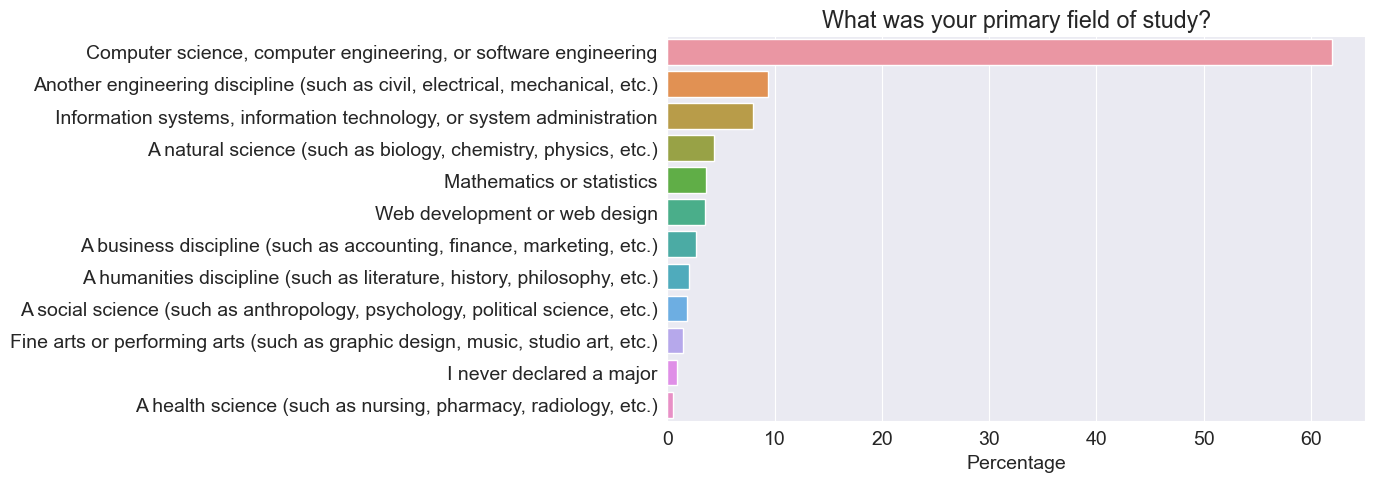

In [67]:
undergrad_pct = survey_df.UndergradMajor.value_counts() * 100 / survey_df.UndergradMajor.count()

sns.barplot(x=undergrad_pct, y=undergrad_pct.index)

plt.title(schema.UndergradMajor)
plt.ylabel(None);
plt.xlabel('Percentage');

It turns out that 40% of programmers holding a college degree have a field of study other than computer science - which is very encouraging. It seems to suggest that while a college education is helpful in general, you do not need to pursue a major in computer science to become a successful programmer.

# Employment

Freelancing or contract work is a common choice among programmers, so it would be interesting to compare the breakdown between full-time, part-time, and freelance work. Let's visualize the data from the Employment column

In [68]:
schema.Employment

'Which of the following best describes your current employment status?'

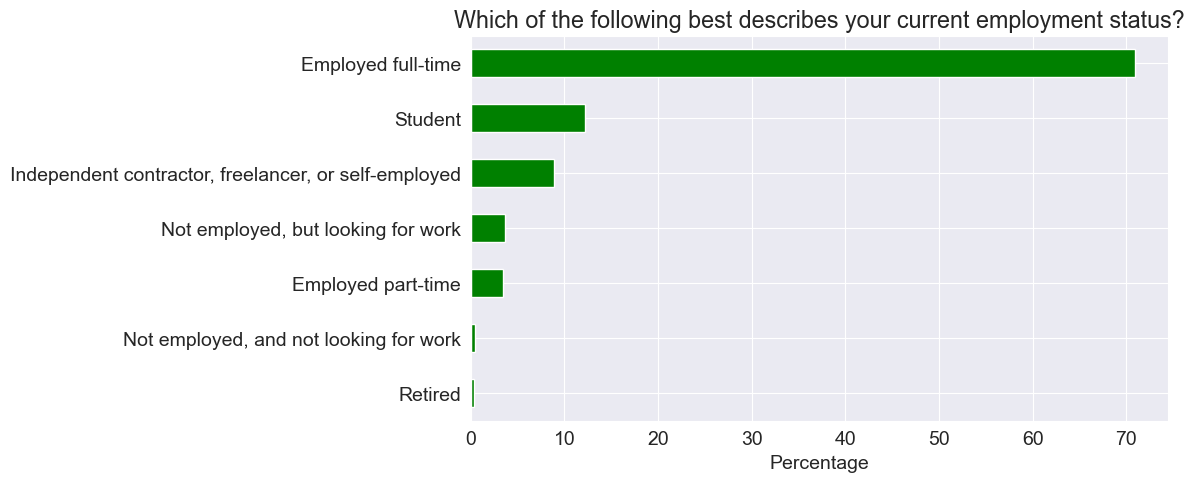

In [69]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema.Employment)
plt.xlabel('Percentage');

It appears that close to 10% of respondents are employed part time or as freelancers.

In [70]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [71]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                           4396
Developer, back-end                                                                                                                                                             3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                  2214
Developer, back-end;Developer, full-stack                                                                                                                                       1465
Developer, front-end                                                                                                                                                            1390
                                                                                               

In [72]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [73]:
dev_type_df = split_multicolumn(survey_df.DevType)

/var/folders/1h/sht1stk91wn_j_0_l59qmtk80000gn/T/ipykernel_1839/3580593157.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, value  in col_series[col_series.notnull()].iteritems():


In [74]:
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [75]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma